# 4.2
## 2.

### Imports

In [11]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Obter série de anos

In [4]:
years = pd.Series([i for i in range(1900, 2021)])

seed_value = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value)

seed_value = 85
sampleyears3 = years.sample(n=12, replace=False, random_state=seed_value)

# Ler os dados

In [5]:
dados_lidos = pd.read_csv("CO_data.csv")

# Obter dados dos anos pretendidos para Portugal e Hungria

In [6]:
# Definição das condições de filtragem.
condicao_anos_PT = dados_lidos.year.isin(list(sampleyears2))
condicao_anos_HU = dados_lidos.year.isin(list(sampleyears3))
condicao_pt = dados_lidos.country == "Portugal"
condicao_hu = dados_lidos.country == "Hungary"

# Extrair dos dados lidos, os dados de trabalho de acordo com as condições de filtro.
dados_PT = dados_lidos.loc[condicao_pt & condicao_anos_PT, "gdp"]
dados_HU = dados_lidos.loc[condicao_hu & condicao_anos_HU, "gdp"]

## Tratar dos NaN

Optámos por remover.

In [7]:
dados_PT.dropna(inplace=True)
dados_HU.dropna(inplace=True)

# Gráficos dos dados

ValueError: x and y must be the same size

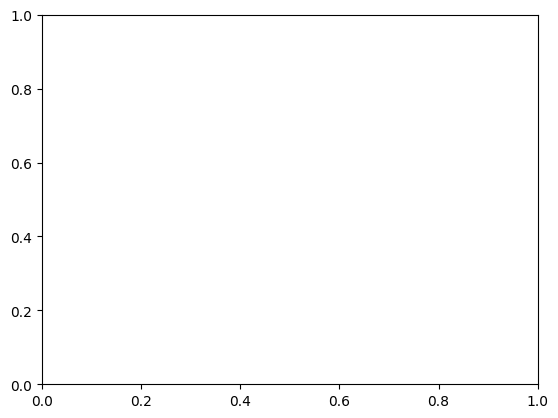

In [6]:
plt.scatter(sampleyears3, dados_HU)

In [ ]:
plt.scatter(sampleyears2, dados_PT)

# Cálcular a média amostral

In [8]:
# Média amostral de Portugal.
media_PT = dados_PT.mean(axis=0)
print(f"Média amostral de Portugal: {media_PT}")

# Média amostral da Hungria.
media_HU = dados_HU.mean(axis=0)
print(f"Média amostral da Hungria: {media_HU}")

Média amostral de Portugal: 107052355677.09091
Média amostral da Hungria: 104133201715.2


# Calcular a variância

In [9]:
variancia_PT = dados_PT.var(axis=0)
print(f"Variância para os dados de Portugal: {variancia_PT}")
variancia_HU = dados_HU.var(axis=0)
print(f"Variância para os dados de Hungria: {variancia_HU}")

Variância para os dados de Portugal: 8.133054978962774e+21
Variância para os dados de Hungria: 5.623953364238139e+21


# Normalidade

O teste à normalidade *stats.normaltest()* é para amostras de dimensão superior a 20.
Temos de utilizar *stats.shapiro()* 

In [12]:
statval_PT, p_value_PT = stats.shapiro(dados_PT)
print(f"Portugal - pvalue: {p_value_PT}")

statval_HU, p_value_HU = stats.shapiro(dados_HU)
print(f"Hungria - pvalue: {p_value_HU}")


Portugal - pvalue: 0.1150248022001375
Hungria - pvalue: 0.18750692545336695


Como o *p-value* de Portugal é inferior a 5% os dados seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

# Teste
Utilizaçao de *One-Way ANova* à média, para amostras não emparelhadas, de tamanho reduzido, mas com distribuição normal.

## Hipotese

$$H_0: \mu_PT   \geq     \mu_HU$  Vs  $H_0: \mu_PT   <     \mu_HU$$

 # Levene

In [ ]:
...


print(f"O valor de pvalue é {resultado.pvalue}")